#### ANOVA : 
1. ANOVA (Analysis of Variance) is a statistical test used to compare the means of three or more groups to determine if at least one group mean is significantly different from the others.

2. Think of it as an extension of the t-test, which compares only two means. But then why not multiple t-tests.

3. Multiple t-test increase the chance of type 1 error. For t-test, we would have done 3 indepenent t-test between 3 groups and even if significance level is 5% in each case, overall chance of error would have increased. so ANOVA is better as it conduct the test between groups simulteneously.

**🎯 When and Why Do We Use ANOVA?**
1. When we have one continuous dependent variable and 1 or more categorical independent variable with 2 or more levels (groups)
2. Continuous dependent variable is normally distrubeted.
3. You want to know do these groups differ significantly in their means?

**Assumptions of ANOVA**
1. Observations are independent
2. Dependent variable is normally distributed within each group
3.  Each group should have common variance i.e. should be homoscedastic i.e. the variability in the dependent variable values within different groups is equal.

It should be noted that the Linear Model used in ANOVA is not affected by minor deviations in the assumptions especially if the sample is large.

**📐 Core Idea Behind ANOVA**

Instead of comparing means directly, ANOVA compares variances within each group and between groups. If between - group variance is significantly higher than within group variance, then we can conclude that group means differ significnatly.
| Source of Variation | Meaning                                                      |
| ------------------- | ------------------------------------------------------------ |
| **Between Groups**  | Variance due to the interaction between groups (e.g., Ads)   |
| **Within Groups**   | Variance due to differences within each group (random noise) |

**The F-Statistic**
ANOVA uses the F-distribution to calculate:

𝐹 = Variance Between Groups/Variance Within Groups
If F is large ⇒ More likely that group means differ.

If F is small (~1) ⇒ Group means are similar; variation is likely due to chance.

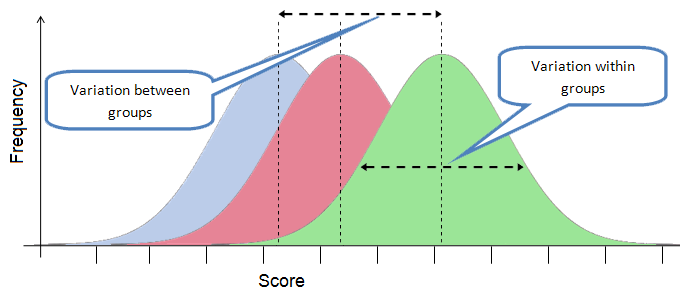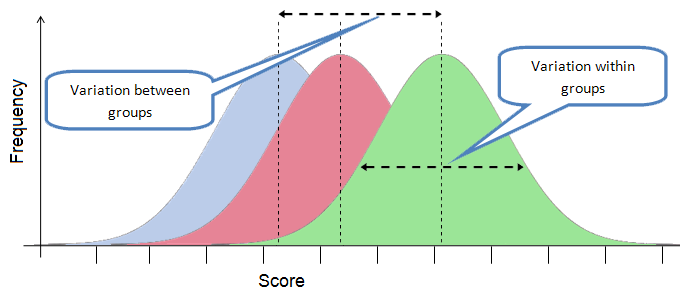

**🧩 Types of ANOVA**
| Type              | When to Use                                              |
| ----------------- | -------------------------------------------------------- |
| One-Way ANOVA     | 1 categorical variable (with ≥2 groups), 1 continuous DV |
| Two-Way ANOVA     | 2 categorical variables (e.g., Ad type and Age group)    |
| Repeated Measures | Same subjects measured under different conditions        |



**Visual Insight into ANOVA**

ANOVA essentially compares the vertical distance between red diamonds (group means) and the height of each box (within-group spread).

If red diamonds are far apart and boxes are tight → likely significant difference.
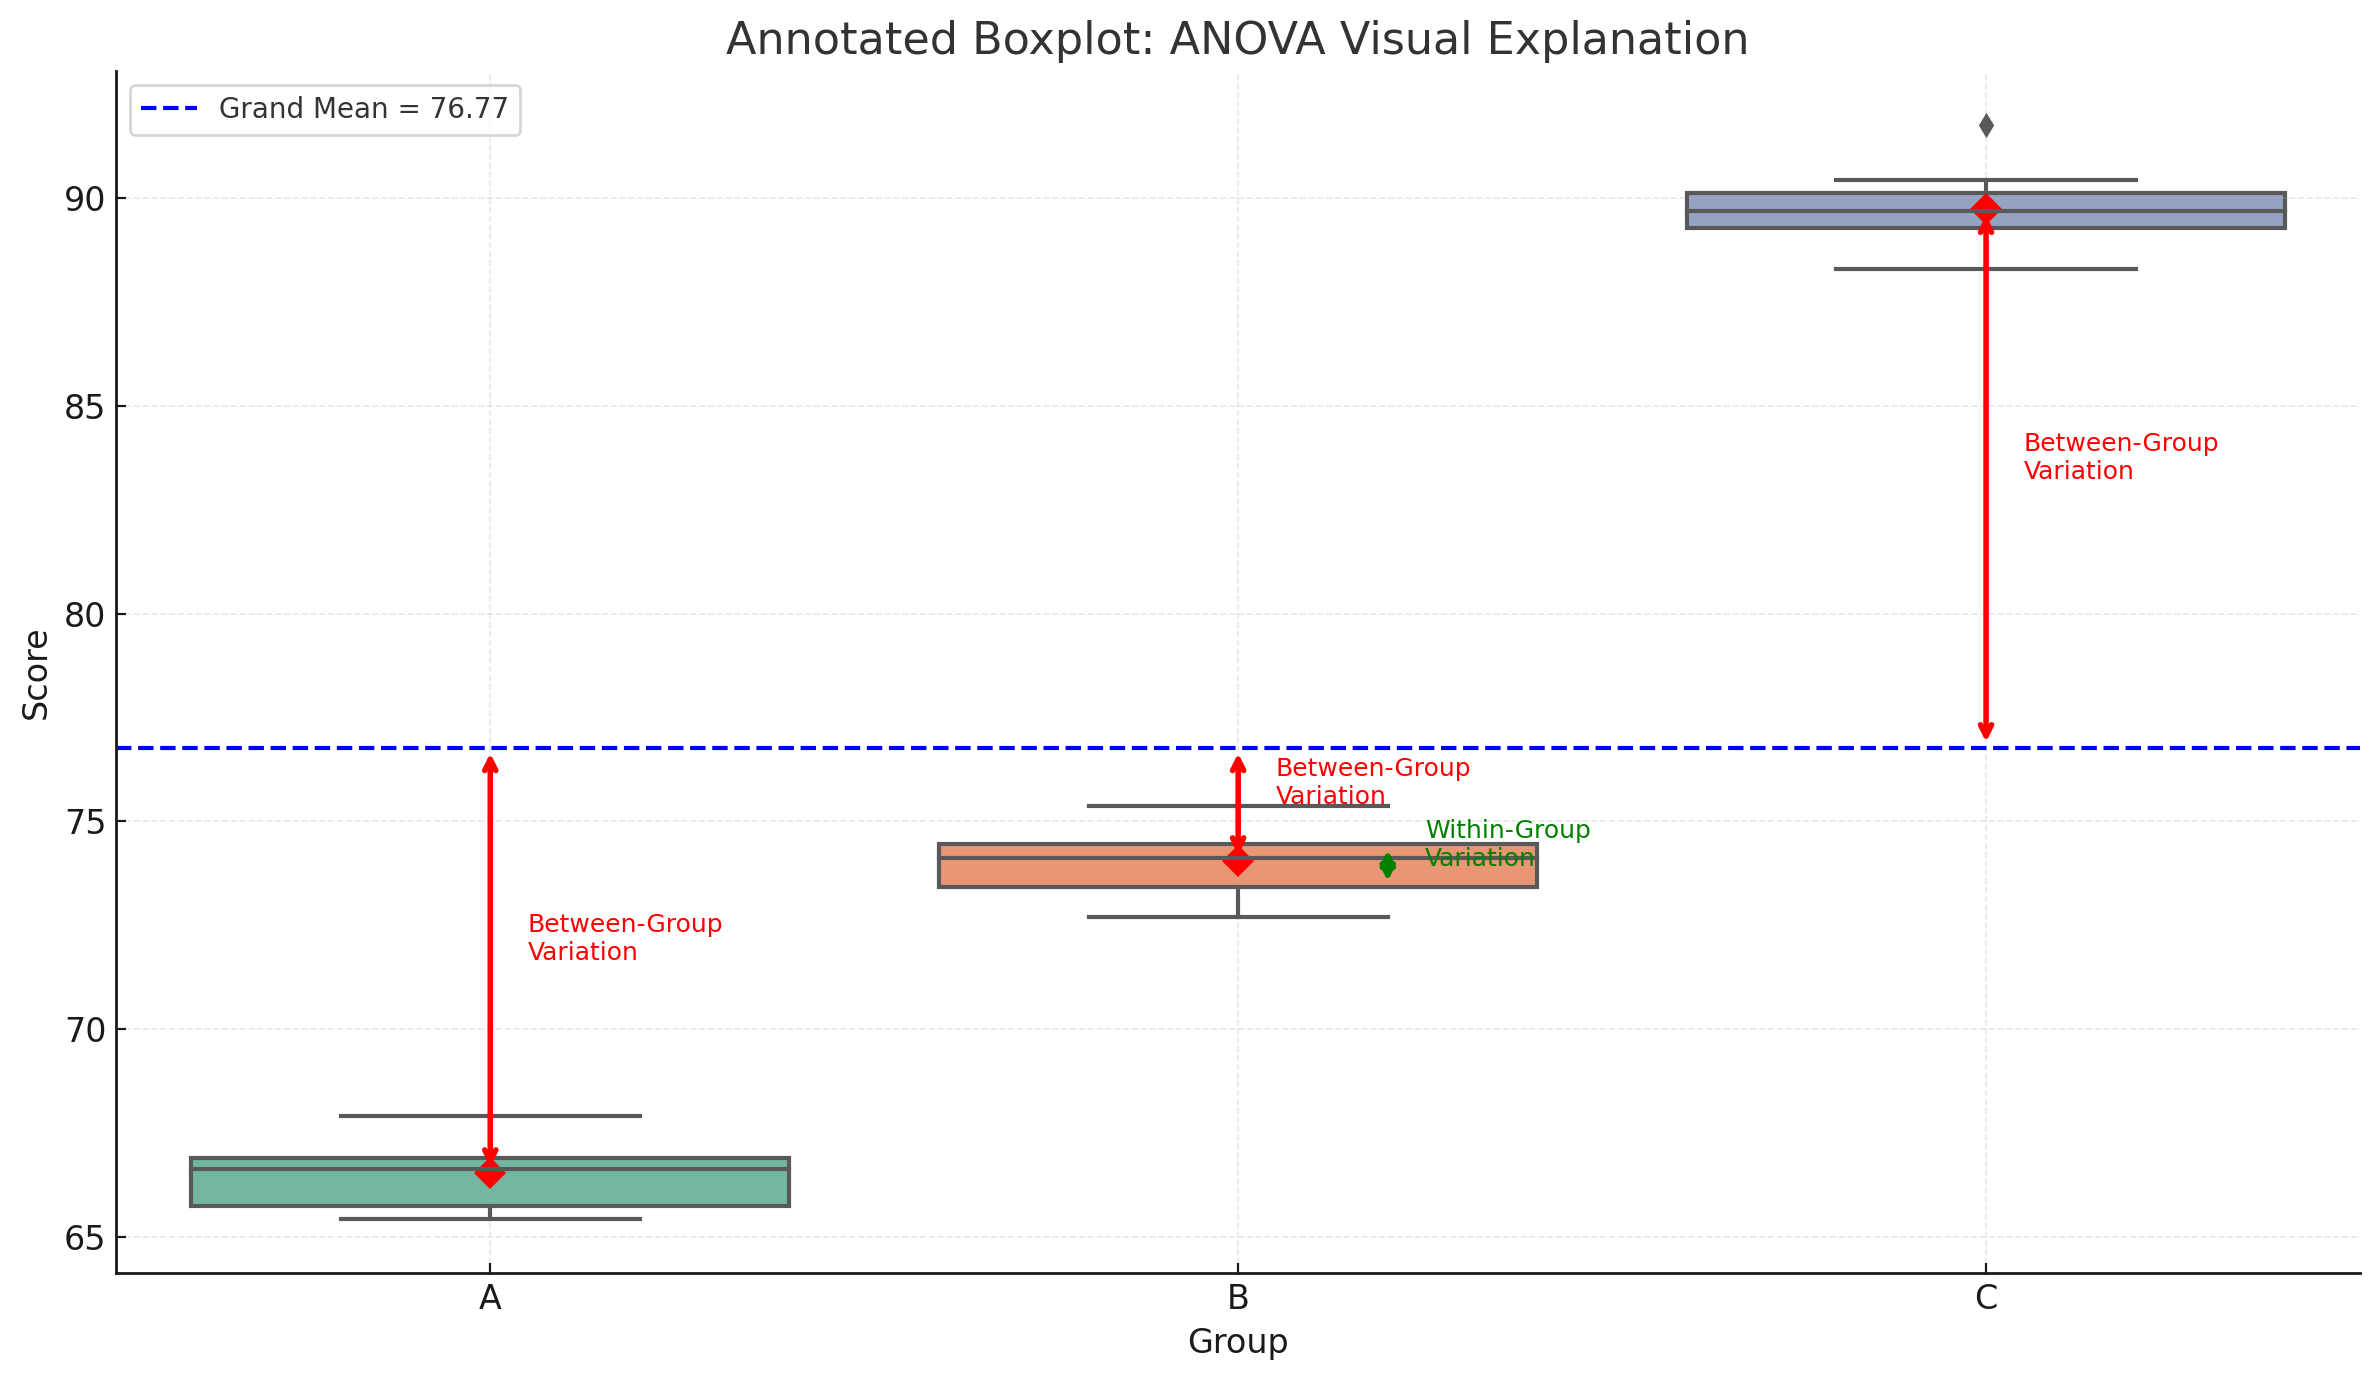

🔴 Red Arrows = Between-Group Variation
These arrows show how much each group mean (red diamond) differs from the grand mean (blue dashed line).

This reflects the signal — i.e., how distinct the groups are.

🟢 Green Arrow = Within-Group Variation
This arrow inside Group B's boxplot shows the spread of scores within that group.

This reflects the noise — i.e., natural variation inside each group.

🎯 What ANOVA Does Visually:
Compares between-group variation (red) vs within-group variation (green)

If red is much longer than green → high F-statistic → significant difference.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
import numpy as np

In [3]:
# Use Case: Feature Selection for Classification
# You're building a machine learning model to predict whether a customer will buy a product (Yes/No), based on features like:

# Age,Annual Income,Spending Score,Customer Segment (clustered)

# You want to know:

# Which numerical features differ significantly across classes (e.g., Buy = 0 or 1)?

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import f_classif
import pandas as pd

# Load Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Species")

# Perform ANOVA F-test
f_values, p_values = f_classif(X, y)

# Combine into a summary table
anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F-value': f_values,
    'p-value': p_values
}).sort_values(by='F-value', ascending=False)

print(anova_df)


             Feature      F-value       p-value
2  petal length (cm)  1180.161182  2.856777e-91
3   petal width (cm)   960.007147  4.169446e-85
0  sepal length (cm)   119.264502  1.669669e-31
1   sepal width (cm)    49.160040  4.492017e-17


✅ Interpretation:
Higher F-value = greater difference between classes

Low p-value → significant feature

Here, petal width and petal length are the most discriminative features for classifying flower species.

**Let’s clarify:**

**Classical ANOVA (what we just studied):**
Use case: Statistical hypothesis testing

Dependent variable: Continuous (e.g., scores, income)

Independent variable: Categorical (e.g., teaching method, gender)

✅ Goal: Test if group means differ

**ANOVA in ML (feature selection with f_classif):**
Use case: Reverse logic for feature selection

Target variable: Categorical (e.g., class labels in classification)

Input features: Continuous (numerical features)

**Goal: Identify which features differ across classes**

🤯 Why does this make sense?
We flip the question:

Instead of asking

**"Do group labels affect a continuous variable?"**

We ask

**"Which continuous variables vary significantly across class labels?"**

That’s still ANOVA logic, just flipped for feature selection.

🎯 Key Intuition:
In ML:

Each class (e.g., Buy = 0 or 1) is treated like a group.

We check whether a numerical feature (e.g., Spending Score) has different means across these class groups.

So yes, the target becomes categorical, and features are continuous — but the logic is still ANOVA!

| Test                              | When Used in ML                      | Type of Feature           | Type of Target  | What It Checks                               |
| --------------------------------- | ------------------------------------ | ------------------------- | --------------- | -------------------------------------------- |
| **Chi-Square**                    | Classification (categorical target)  | **Categorical**           | **Categorical** | Association between feature and target       |
| **ANOVA (f\_classif)**            | Classification                       | **Numerical**             | **Categorical** | Whether means differ across classes          |
| **Mutual Info (MI)**              | Classification or Regression         | Categorical or Continuous | Any             | Measures general dependence                  |
| **Correlation (Pearson)**         | Regression                           | **Numerical**             | **Numerical**   | Linear relationship                          |
| **Kruskal-Wallis / Mann-Whitney** | Non-parametric alternatives to ANOVA | Numerical                 | Categorical     | Group differences when normality is violated |
